# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mergedResults = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner')

# Display the data table for preview
mergedResults.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
unique_mice = mergedResults['Mouse ID'].unique()
total_unique_mice = len(unique_mice)
total_unique_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mergedResults[mergedResults.duplicated(['Mouse ID', 'Timepoint'])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_data_g989 = mergedResults[mergedResults['Mouse ID'] == 'g989']
dup_data_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = mergedResults.drop_duplicates(['Mouse ID', 'Timepoint'], keep="last")
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df = cleaned_df[cleaned_df['Mouse ID'] != 'g989']
mouseNum = cleaned_df['Mouse ID'].nunique()
mouseNum

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={'mean':'Mean Tumor Volume','median':'Median Tumor Volume','var':'Tumor Volume Variance','std':'Tumor Volume Std. Dev.','sem':'Tumor Volume Std. Err.'})
summary_stats
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_stats = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats
# Using the aggregation method, produce the same summary statistics in a single line.


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

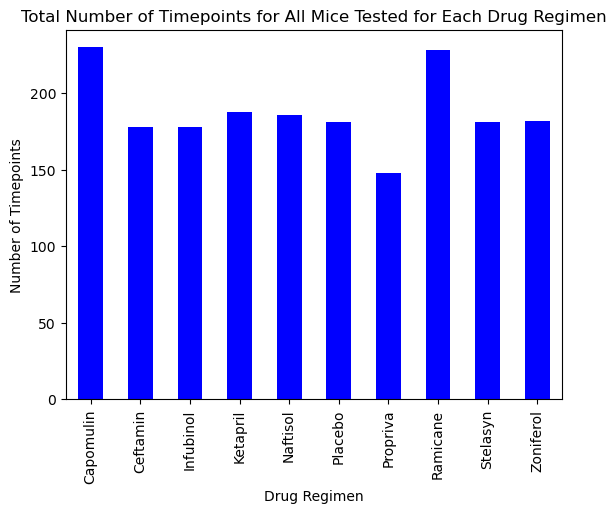

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = cleaned_df.groupby('Drug Regimen')['Timepoint'].count()
timepoints.plot(kind='bar', title="Total Number of Timepoints for All Mice Tested for Each Drug Regimen", color='blue')
plt.ylabel('Number of Timepoints')
plt.xlabel('Drug Regimen')
plt.show()


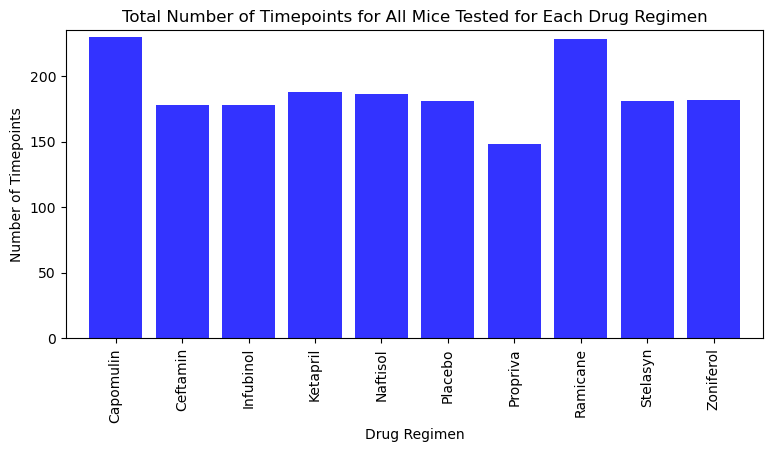

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(timepoints))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(9,4))
plt.bar(x_axis, timepoints, color='blue', alpha=0.8, align="center")
plt.xticks(tick_locations, timepoints.index, rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(timepoints)+5)

plt.title("Total Number of Timepoints for All Mice Tested for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

plt.savefig("TotalNumberTimepoints_pyplot.png")
plt.show()


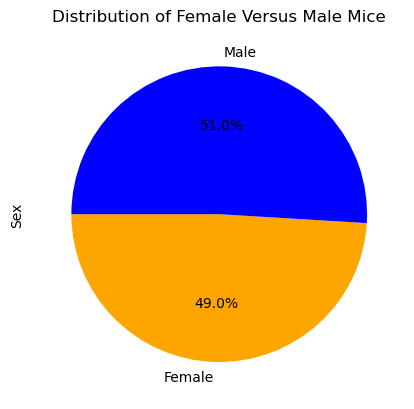

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice = cleaned_df.groupby('Sex')['Mouse ID'].count()
mice.plot(kind='pie', title="Distribution of Female Versus Male Mice", autopct='%1.1f%%', startangle=180, colors=["orange", "blue"])
plt.ylabel('Sex')
plt.show()


([<matplotlib.patches.Wedge at 0x2214bbf2520>,
 [Text(-0.03608946990830782, -1.1994571897995099, 'Female'),
  Text(0.03308201408261563, 1.0995024239828841, 'Male')],
 [Text(-0.021052190779846224, -0.6996833607163808, '49.0%'),
  Text(0.018044734954153978, 0.5997285948997549, '51.0%')])

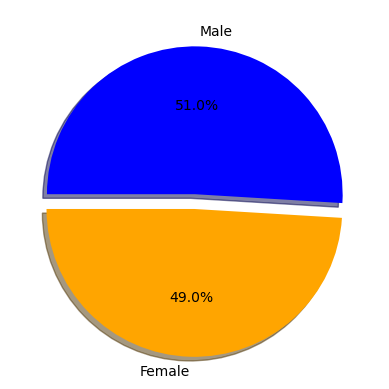

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mice.index

# The values of each section of the pie chart
sizes = mice

# The colors of each section of the pie chart
colors = ["orange", "blue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = cleaned_df.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = cleaned_df.merge(max_timepoint, on=['Mouse ID', 'Timepoint'])
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = {}
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
for treatment in treatments:
    subset = merged_data.loc[merged_data['Drug Regimen']==treatment]
    tumor_vol = subset['Tumor Volume (mm3)']
    tumor_vol_data[treatment] = tumor_vol
    
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers_list = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)].tolist()
    if len(outliers_list) > 0:
        print(f"{treatment}'s potential outliers: {outliers_list}")
    else:
        print(f"{treatment} has no potential outliers.")    

Capomulin has no potential outliers.
Ramicane has no potential outliers.
Infubinol's potential outliers: [36.3213458]
Ceftamin has no potential outliers.


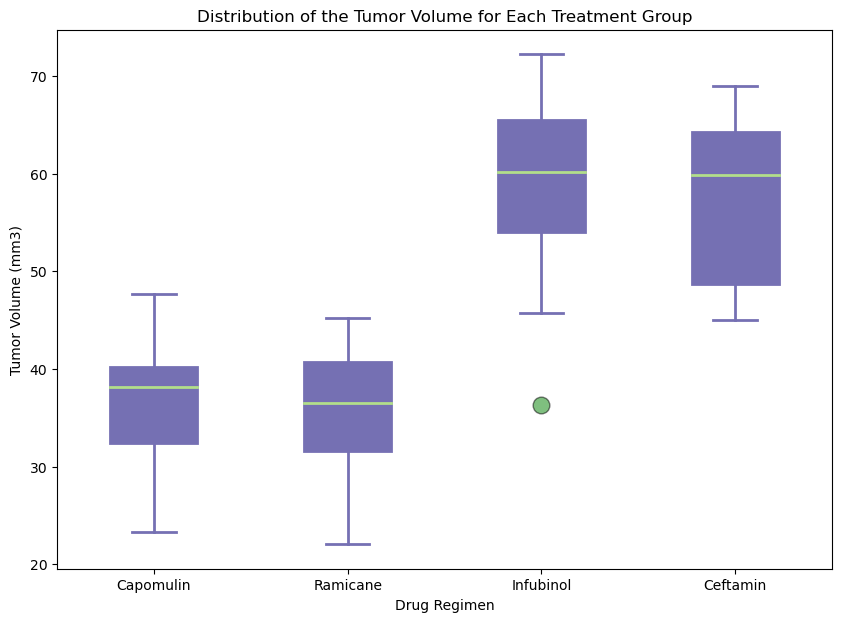

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Set figure size
plt.figure(figsize=(10,7))

# Create an empty list to fill with data
data_to_plot = []

# Set colors
colors = ['red', 'green', 'blue', 'orange']

# Fill the data list with the tumor volumes data of each treatment
for treatment in treatments:
    data_to_plot.append(tumor_vol_data[treatment])

# Create the box plot
flierprops = dict(marker='o', markerfacecolor='green', markersize=12, linestyle='none')
bp = plt.boxplot(data_to_plot, labels=treatments, flierprops=flierprops, patch_artist=True)

# Change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

# Change color and linewidth of the boxes
for box in bp['boxes']:
    box.set(color='#7570b3', linewidth=2)

# Change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

# Change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

# Change the median color and linewidth
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

# Set the chart title and labels
plt.title('Distribution of the Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()


## Line and Scatter Plots

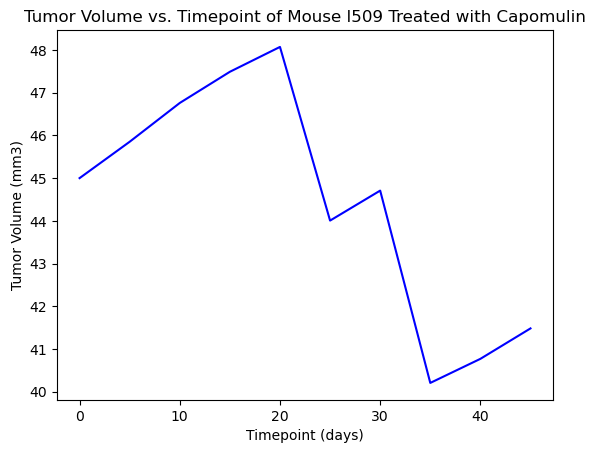

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_data = cleaned_df.loc[cleaned_df['Mouse ID'] == 'l509']
mouse_data

# Create the line plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color='blue')

# Set the chart title and labels
plt.title('Tumor Volume vs. Timepoint of Mouse l509 Treated with Capomulin')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()


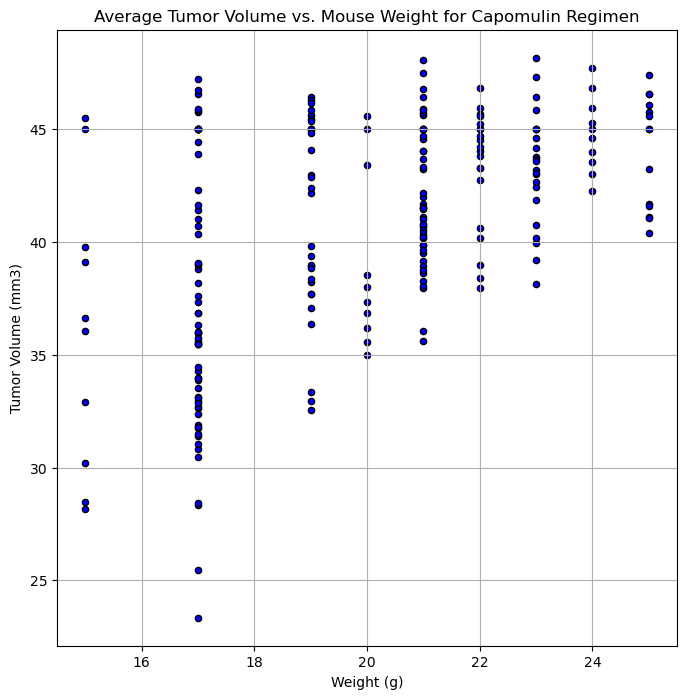

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']
capomulin_df.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', 
                  color='blue', edgecolors='black', grid=True, figsize=(8,8))

# Set the chart title and labels
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()


## Correlation and Regression

The correlation between both factors is 0.53


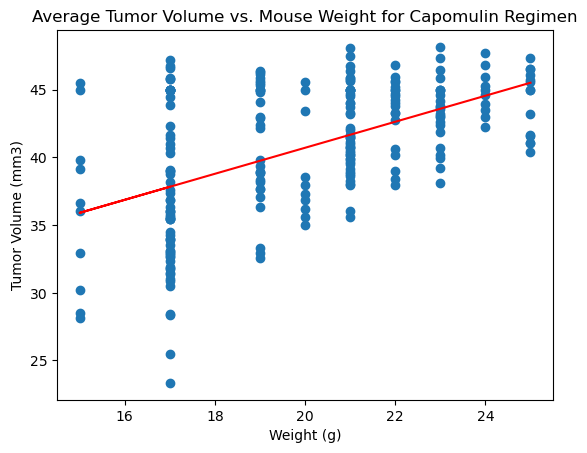

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate the correlation coefficient
weight = capomulin_df.iloc[:, 4]
tumor_volume = capomulin_df.iloc[:, 6]
correlation = st.pearsonr(weight,tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_df['Weight (g)']
y_values = capomulin_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression model on top of the previous scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# Set the chart title and labels
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

# Show the chart
plt.show()
